## Players   ... regression

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Players.csv into dataframe
f = open('Players.csv','rU')
players = pd.read_csv(f)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


In [3]:
players.head()

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2


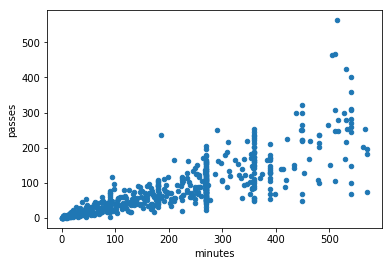

In [4]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
# Reminder: copy-paste-modify approach to programming!
players.plot.scatter(x='minutes', y='passes')
plt.show()

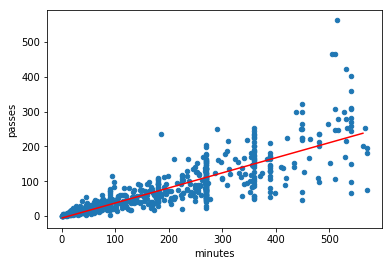

In [5]:
# Add linear regression ... esto hace una linea
players.plot.scatter(x='minutes', y='passes')
# le das los parametros de la linea ocupas 2 puntos valor de a y b (en la a esta leyendo latitud
a,b = np.polyfit(players.minutes, players.passes, 1) # Regression line is y = ax + b
x1 = min(players.minutes)
x2 = max(players.passes)
#aqui defino la x y la y entre corchetes los primeros corchetes es de x y los segundos de la y (los rangos)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()
# Beautify using plt.xlim(x1,x2)

In [6]:
# Show the correlation coefficient for the passes-minutes regression.
# Also show correlation coefficients for tackles versus minutes, shots
# versus minutes, and saves versus minutes (EL NUMERO DE SALVADAS DEPENDE DEL JUGADOR NO DEL TIEMPO)

In [7]:
# Correlation coefficients (r values) (MEDIDA DE QUE TAN RELACIONADOS ESTAN MIS DATOS) NUMEROS NEGATIVOS
# DE IZ A DERECHA HACIA ARRIBA, ENTRE MAS ALEJADO DEL ECUADOR MAS FRIO... AUMENTA LATITUD, BAJA LA TEMP.,
# SI HUBIERA TOMADO LONGUITUD ESTA MUY DISPERSA LA GRAFICA.
c1 = np.corrcoef(players.minutes, players.passes)[1,0]
print('Correlation coefficient for minutes versus passes:', c1)
c2 = np.corrcoef(players.minutes, players.tackles)[1,0]
print('Correlation coefficient for minutes versus tackles:', c2)
c3 = np.corrcoef(players.minutes, players.shots)[1,0]
print('Correlation coefficient for minutes versus shots:', c3)
c4 = np.corrcoef(players.minutes, players.saves)[1,0]
print('Correlation coefficient for minutes versus saves:', c4)

Correlation coefficient for minutes versus passes: 0.8151193157954874
Correlation coefficient for minutes versus tackles: 0.6106734613835509
Correlation coefficient for minutes versus shots: 0.40792307740541667
Correlation coefficient for minutes versus saves: 0.22847723253087993


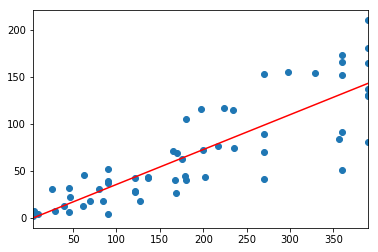

Enter player name (or "quit" to quit): Abdoun
Predicted minutes: 4.180502809615287
Actual passes: 6


In [ ]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal
train = players[(players.team=='Greece') | (players.team=='USA') | (players.team=='Portugal')]
# Compute and show regression
plt.scatter(train.minutes, train.passes)
a,b = np.polyfit(train.minutes, train.passes, 1)
x1 = min(train.minutes)
x2 = max(train.minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = input('Enter player name (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    if len(player) == 0:
        print('Player not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted minutes:', a * int(player.minutes) + b)
        print('Actual passes:', int(player.passes))

In [ ]:
# SUPER BONUS!!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string